# Loading packages

In [123]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_recall_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report, f1_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from itertools import product
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# 1. Importing the dataset

In [3]:
df = pd.read_csv('data/Train.csv')

In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Exploratory Data Analysis

In [5]:
# Let’s observe the shape of our datasets.
print('df data shape :', df.shape)

df data shape : (23524, 13)


In [6]:
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [8]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524.0,NaN,NaN,NaN,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
uniqueid,23524,8735,uniqueid_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524.0,NaN,NaN,NaN,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,NaN,NaN,NaN,38.80522,16.520569,16.0,26.0,35.0,49.0,100.0
gender_of_respondent,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.location_type.head(10)

0    Rural
1    Rural
2    Urban
3    Rural
4    Urban
5    Rural
6    Rural
7    Rural
8    Rural
9    Urban
Name: location_type, dtype: object

In [11]:
pd.crosstab(df['bank_account'], df['location_type'], margins=True)

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


In [12]:

# Create a table with coresponing percentages persentage
cross_tab = pd.crosstab(df['bank_account'], df['location_type'], normalize='columns') * 100

# print a table
print(cross_tab)


location_type      Rural     Urban
bank_account                      
No             88.349718  82.12613
Yes            11.650282  17.87387


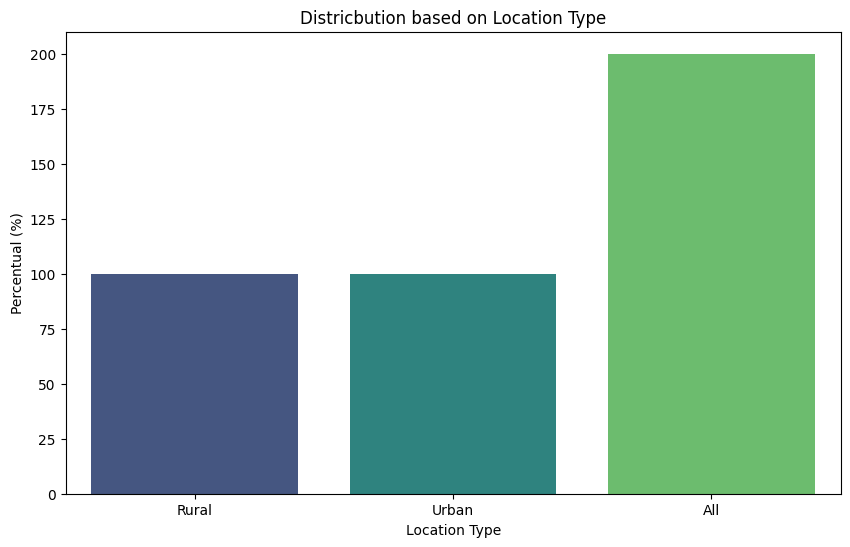

In [13]:
# Creates a contingency table with percentages
cross_tab = pd.crosstab(df['bank_account'], df['location_type'], normalize='columns') * 100

# Adds the "All" column that shows the total per row
cross_tab['All'] = cross_tab.sum(axis=1)

# Adds the "All" row that shows the total per column
cross_tab.loc['All'] = cross_tab.sum()

# Generates a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.columns, y=cross_tab.loc['All'], palette='viridis')
plt.title('Districbution based on Location Type')
plt.xlabel('Location Type')
plt.ylabel('Percentual (%)')
plt.show()


In [14]:
# List of additional variables
additional_vars = ['country','cellphone_access', 'gender_of_respondent', 'education_level', 'job_type']

# Adds the additional variables to the contingency table with percentages
cross_tab = pd.crosstab(df['bank_account'], [df['location_type']] + [df[var] for var in additional_vars], normalize='columns') * 100

# Adds the "All" column that shows the total per row
cross_tab['All'] = cross_tab.sum(axis=1)

# Adds the "All" row that shows the total per column
cross_tab.loc['All'] = cross_tab.sum()

# Displays the table
print(cross_tab)


location_type                      Rural                        
country                            Kenya                        
cellphone_access                      No                        
gender_of_respondent              Female                        
education_level      No formal education                        
job_type             Farming and Fishing Government Dependent   
bank_account                                                    
No                             95.098039            85.714286  \
Yes                             4.901961            14.285714   
All                           100.000000           100.000000   

location_type                                                                
country                                                                      
cellphone_access                                                             
gender_of_respondent                                                         
education_level                      

<Figure size 800x600 with 0 Axes>

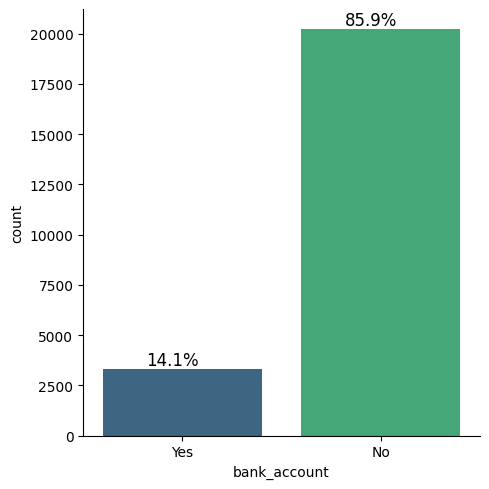

In [15]:
# Create the catplot
plt.figure(figsize=(8, 6))
ax = sns.catplot(x="bank_account", kind="count", data=df, palette="viridis")

# Replace category labels
df['bank_account'] = df['bank_account'].replace({0: 'No', 1: 'Yes'})

# Add percentages on the bars
total = len(df['bank_account'])
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 20
    ax.ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()


So, my observation until now is following:
* Almost 85% of observations don't have bank account
* Most of the respondents are from the rural area (+- 60%)
* 74% have cellphone, but probably not a smartphone
* A bit more than 50% are head of household. I suspect that there are many people that live alone
* 86% of peolple don't have bank account
* Low level educatiom. 70% with no education or just primary education

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

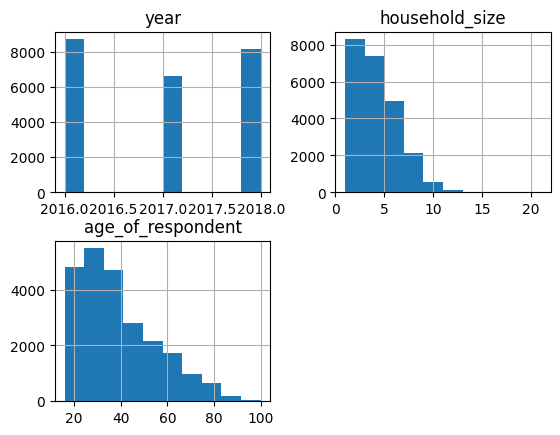

In [16]:
df.hist()

In [17]:
df['household_size'].value_counts().sort_index()

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: count, dtype: int64

In [18]:
df['relationship_with_head'].value_counts().sort_index()

relationship_with_head
Child                   2229
Head of Household      12831
Other non-relatives      190
Other relative           668
Parent                  1086
Spouse                  6520
Name: count, dtype: int64

In [19]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: count, dtype: int64

In [20]:
df['education_level'].value_counts().sort_index()

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: count, dtype: int64

In [21]:
df['job_type'].value_counts().sort_index()

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: count, dtype: int64

In [22]:
df_bank_account = df.copy()

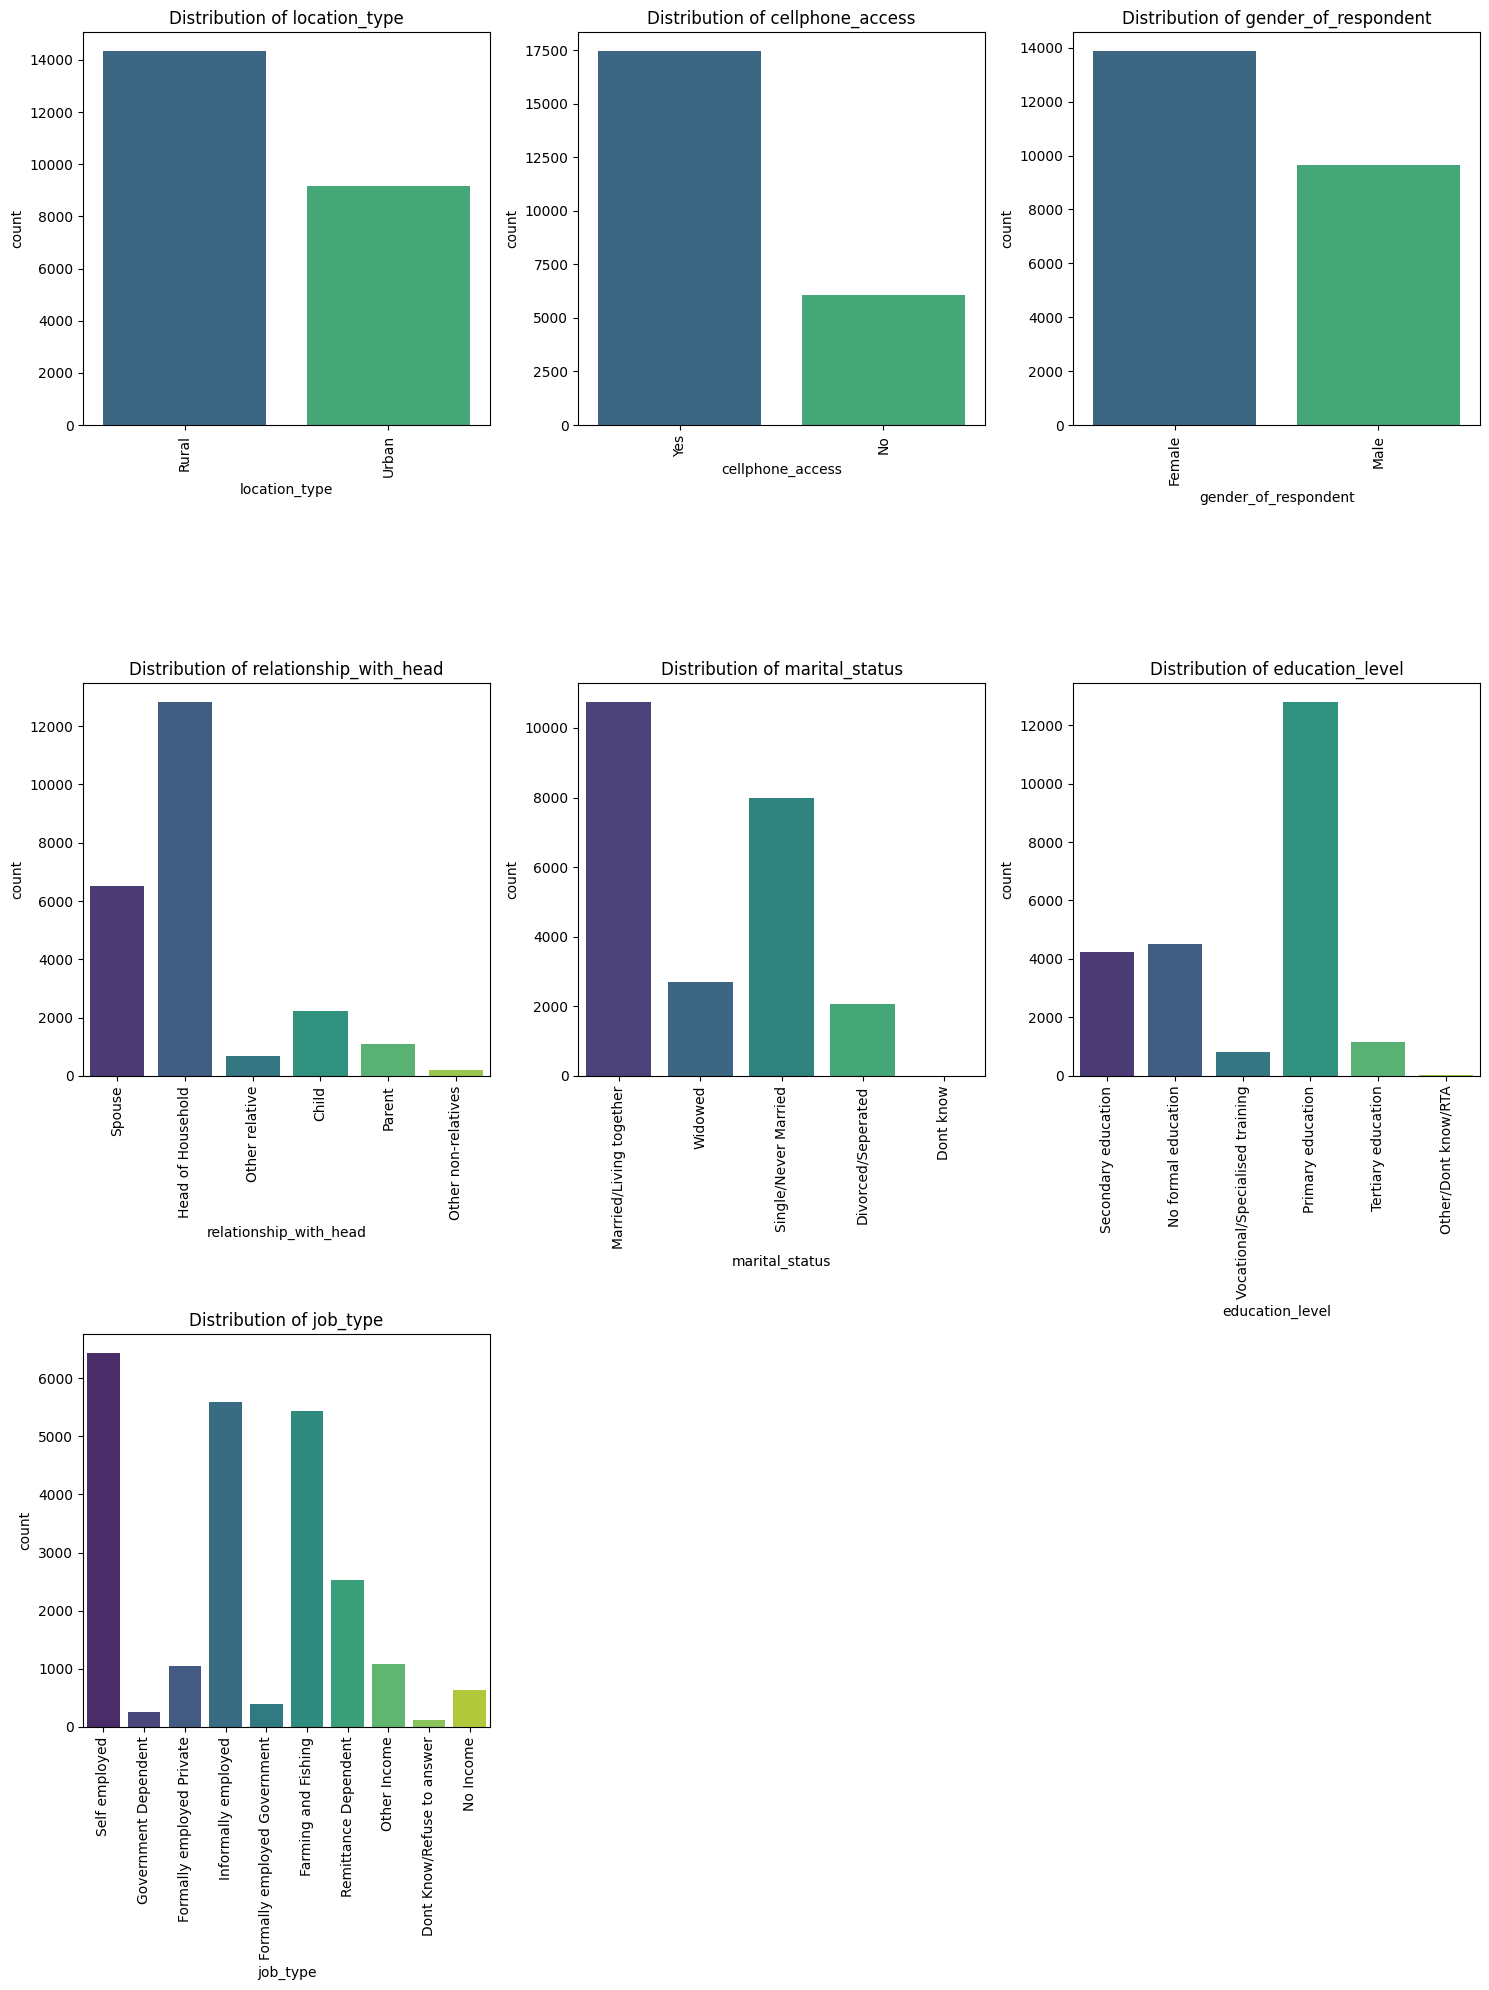

In [23]:
# Selecting categorical variables
categorical_vars = ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Configuring the size of the plot
plt.figure(figsize=(15, 20))

# Loop over categorical variables to create subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)

# Adjusting the layout
plt.tight_layout()
plt.show()


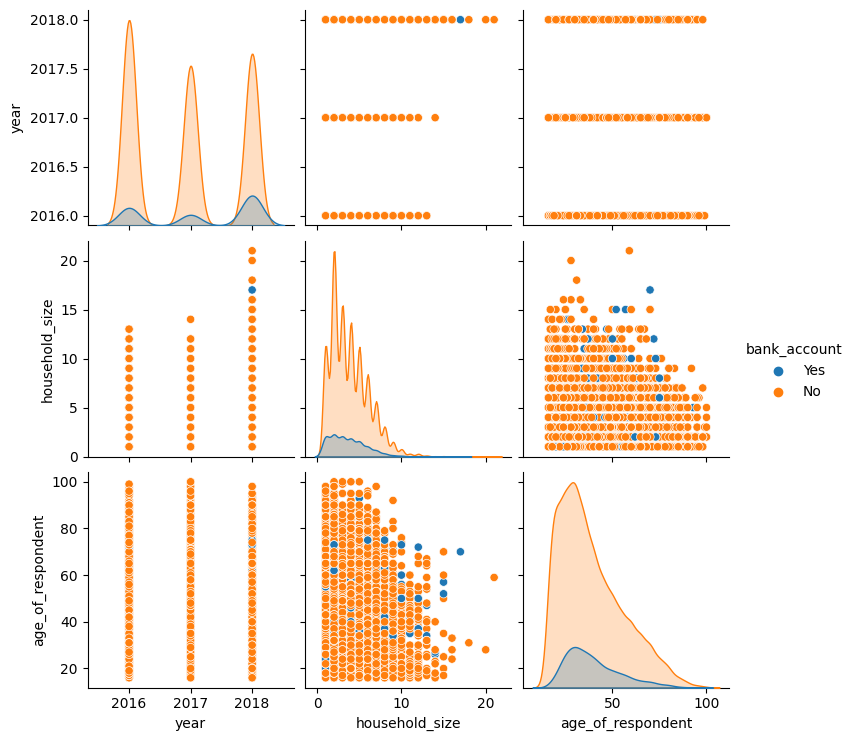

In [24]:
sns.pairplot(df_bank_account, hue='bank_account')  

# Feature engineering part 1

Applying Label Encoding technic. Converting all categories into numeric values.

In [25]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bank_account[variable] = le.fit_transform(df_bank_account[variable])

In [26]:
df_bank_account.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [27]:
df_bank_account.drop('uniqueid', inplace=True, axis=1) 

In [28]:
df_bank_account.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.094991,-0.161362,0.152285,-0.150003,-0.119158,-0.058778,-0.027055,0.130408,0.009282,-0.050706,0.381066
year,-0.094991,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,-0.161362,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.152285,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.150003,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.119158,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.058778,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,-0.027055,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.130408,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,0.009282,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011


## Creating correlation matrix
### Feature selection

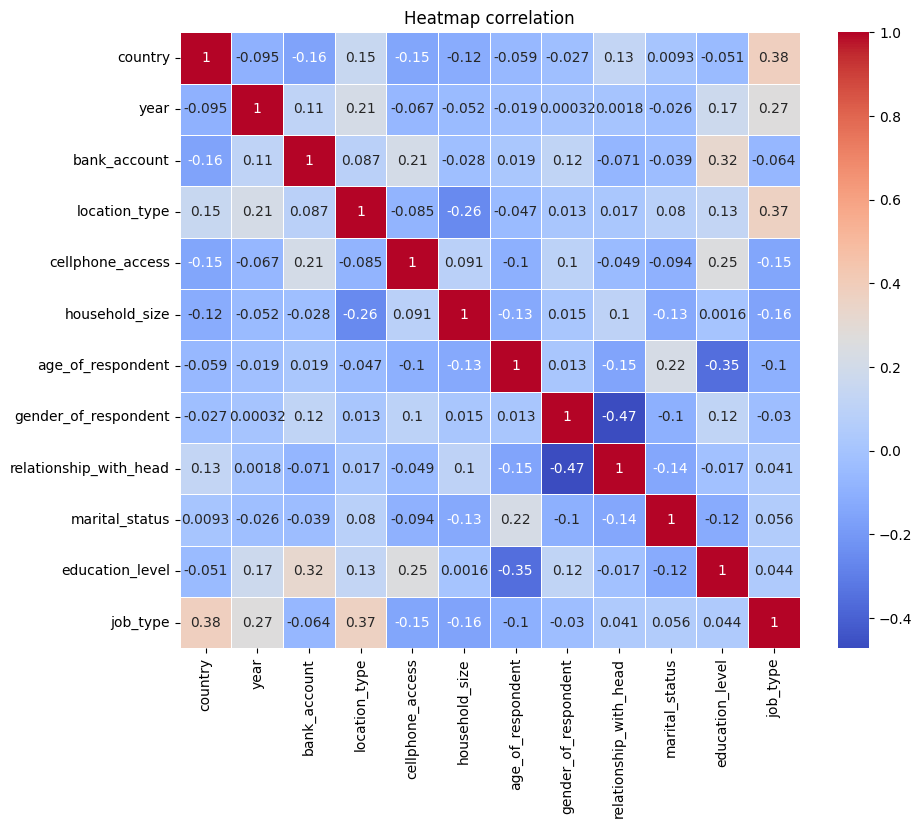

In [29]:
# Select the columns to include in the heatmap
cols = ['job_type', 'bank_account']


# Create a correlation matrix between the selected columns
correlation_matrix = df_bank_account.corr()

# Configure the size of the figure
plt.figure(figsize=(10, 8))

# Create the heatmap with colors
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title of the heatmap
plt.title('Heatmap correlation')

# Display the heatmap
plt.show()


In [30]:
df_bank_account.drop(['household_size', 'marital_status'], inplace=True, axis=1) 

In [31]:
df_bank_account.head()

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,education_level,job_type
0,0,2,1,0,1,24,0,5,3,9
1,0,2,0,0,0,70,0,1,0,4
2,0,2,1,1,1,26,1,3,5,9
3,0,2,0,0,1,34,0,1,2,3
4,0,2,0,1,0,26,1,0,2,5


In [32]:
df_bank_account.shape

(23524, 10)

## Hypothesis

* Most peolple that don't have bank account are from rural area.
* Peolple with cell phones have no bank account
* Peolple with high education have more access to bank account

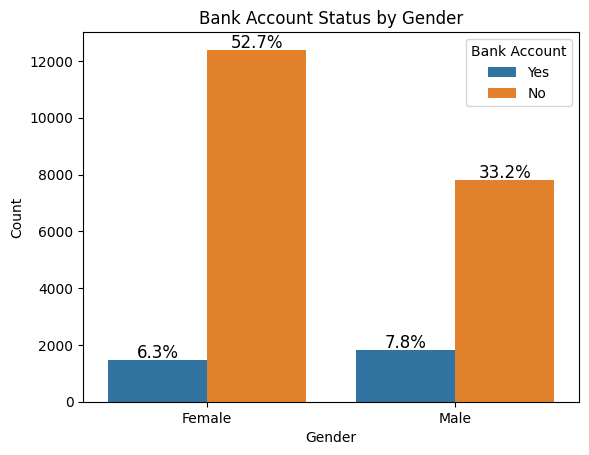

In [33]:
ax = sns.countplot(x='gender_of_respondent', hue='bank_account', data=df)
# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
# Customize the plot
plt.title("Bank Account Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])
# Show the plot
plt.show()

In [34]:
df_original = df.copy()

In [35]:
df_original.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

# Feature engineering part 2

How I'm gonna handle this:

1. Treat missing values.   
Drop samples, drop the feature, impute them (mean/median/mode, draw numbers from the same distribution, conditional values - kNN k-nearest neighbors im feature space) 
2. Decide with features to use    
I dropped the features 'uniqueID', 'household_size', 'marital_status' based on the correlation analysis which seems to me wouldn't have impact on prediction as they almost don't correlate with any other feature
3. Decide on a model     
Logistic Regression, kNN Classifier,  (take the majority value of the k nearest neighbors)
4. Treat the features accordingly:
'country' - OHE (one-hot-encode)   
'year' - OHE
'uniqueid' - drop
'bank_account' - in the 'Target/Y file' drop
'location_type' - Label encoding
'cellphone_access' - Label encoding
'household_size' - drop
'age_of_respondent' - KBinDiscretizer (OHE)
'gender_of_respondent' - Label encoding
'relationship_with_head' - OHE
'marital_status' - drop
'education_level' - OHE
'job_type' - OHE

### Preparing data for creating Dummy variable

In [36]:
df_dumvar = df_original.copy()

Getting rid of variables with wide distribution of numerical data

In [37]:
df_dumvar.drop(['household_size', 'marital_status','uniqueid'], inplace=True, axis=1) 

Converting years type into stirng

In [38]:
df_dumvar['year'] = df_dumvar['year'].astype(str)

In [39]:
le = LabelEncoder()
variables_to_encode = ['bank_account']
for variable in variables_to_encode:
    df_dumvar[variable] = le.fit_transform(df_dumvar[variable])

In [40]:
df_dumvar.dtypes

country                   object
year                      object
bank_account               int64
location_type             object
cellphone_access          object
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
education_level           object
job_type                  object
dtype: object

In [41]:
df_dumvar

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,education_level,job_type
0,Kenya,2018,1,Rural,Yes,24,Female,Spouse,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,70,Female,Head of Household,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,26,Male,Other relative,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,34,Female,Head of Household,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,26,Male,Child,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,Rural,Yes,48,Female,Head of Household,No formal education,Other Income
23520,Uganda,2018,0,Rural,Yes,27,Female,Head of Household,Secondary education,Other Income
23521,Uganda,2018,0,Rural,Yes,27,Female,Parent,Primary education,Other Income
23522,Uganda,2018,0,Urban,Yes,30,Female,Parent,Secondary education,Self employed


### Creating Dummy variables

In [42]:
df_dum = pd.get_dummies(df_dumvar)

In [43]:
df_dum

,bank_account,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,24,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0,70,True,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
2,1,26,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,34,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,0,26,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,48,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23520,0,27,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23521,0,27,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23522,0,30,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Balancing data and spliting into train and test datasets

In [44]:

# Reshape the 'age_of_respondent' column to a 2D array
age_values = df_dum['age_of_respondent'].values.reshape(-1, 1)

# Create KBinsDiscretizer instance
kbin_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the 'age_of_respondent' column
age_bins = kbin_discretizer.fit_transform(age_values)

# Replace the original 'age_of_respondent' column with the discretized values
df_dum['age_of_respondent'] = age_bins


In [135]:
df_dum.head()

,bank_account,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0.0,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0,6.0,True,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
2,1,1.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,2.0,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,0,1.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


Definging prediction target

In [173]:
# select the target
X = df_dum.drop(['bank_account'], axis=1)
y = df_dum['bank_account']

In [174]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

### Sample #2
Different method to balance/resample the dataset that could be used in models:

In [49]:
# X_resampled2, y_resampled2 = oversampler.fit_resample(X,y) #original

In [50]:
#Using SMOTE to oversample the minority class
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [176]:
X_resampled, y_resampled = oversampler.fit_resample(X_train,y_train)

In [177]:
y_resampled.value_counts().sort_index()

bank_account
0    16149
1    16149
Name: count, dtype: int64

### Creating Models:

In [178]:
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [179]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [180]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [181]:
X_train.shape

(18819, 36)

### Running models

Uncomment and run when fit the model with datasets resampled by another technic (SMOK):

In [57]:
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#knn.fit(X_resampled2, y_resampled2)

KNN Prediciton:

In [182]:
# Knn Prediction
y_pred = rf.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("-----"*10)


Accuracy: 0.7985122210414453
Recall: 0.6573208722741433
--------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.80')

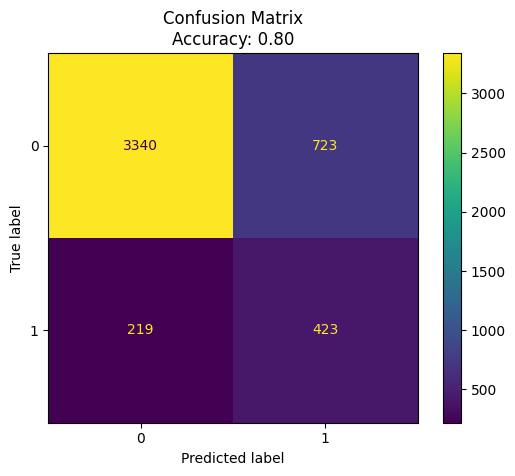

In [146]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

Logistic Regression: 
(uncomment X_resampled2 and y_resampled2 at the next iteration)

In [183]:
# Logistic regression prediction

logistic_regression = LogisticRegression()
logistic_regression.fit(X_resampled, y_resampled)
#logistic_regression.fit(X_resampled2, y_resampled2)

y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.7902231668437832
Recall: 0.7414330218068536


In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4063
           1       0.37      0.74      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.82      4705



Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.79')

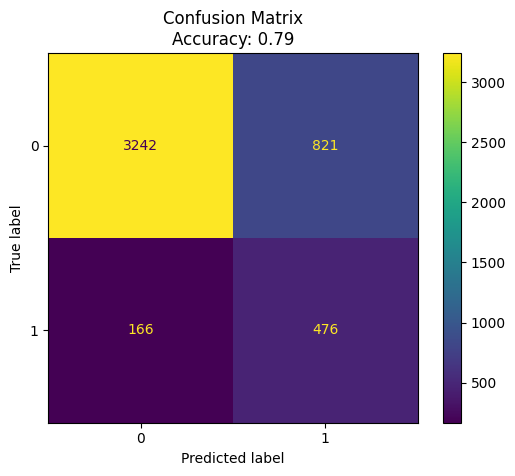

In [149]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

Precision-Recall Curve

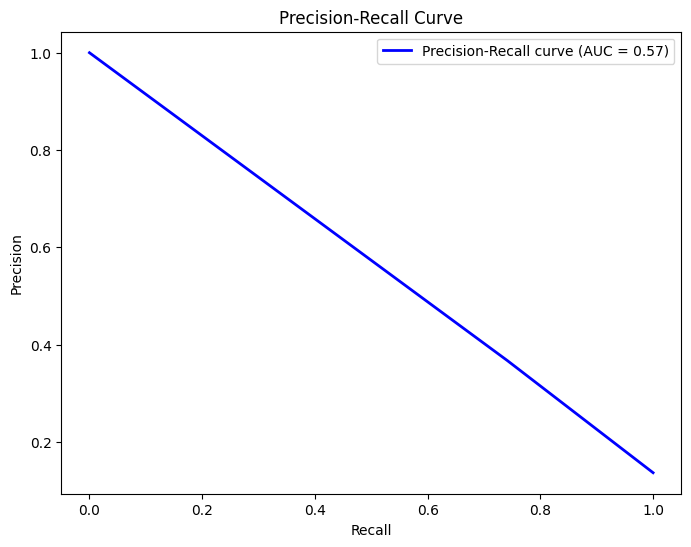

In [185]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.79')

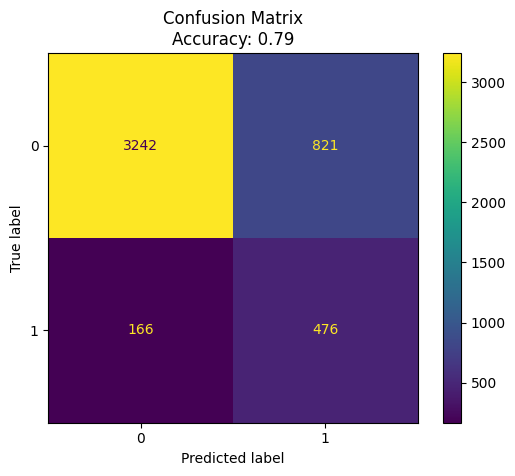

In [151]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

### GRID

In [186]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Set the values for each paramter we would like to check

In [187]:
params_dict = {'bootstrap': [True, False],'n_estimators': [200, 100, 50, 10],
               'max_depth': [5,10,15]}

In [188]:
gridsearch = GridSearchCV(rf, params_dict, cv=5, n_jobs=-1)

In [189]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [200, 100, 50, 10]})

In [190]:
gridsearch.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 200}

In [191]:
gridsearch.best_estimator_.score(X_test, y_test)

0.8890541976620616

Random Forest model: 
(uncomment X_resampled2 and y_resampled2 at the next iteration)

In [192]:
# Random forest prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creating an instance of the RandomForest classifier
rf_classifier = RandomForestClassifier(bootstrap=True, n_estimators=100,max_depth=10, random_state=42)

# Training the model on the training set
rf_classifier.fit(X_resampled, y_resampled)
#rf_classifier.fit(X_resampled2, y_resampled2)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7946865037194474
Recall: 0.7570093457943925


Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.79')

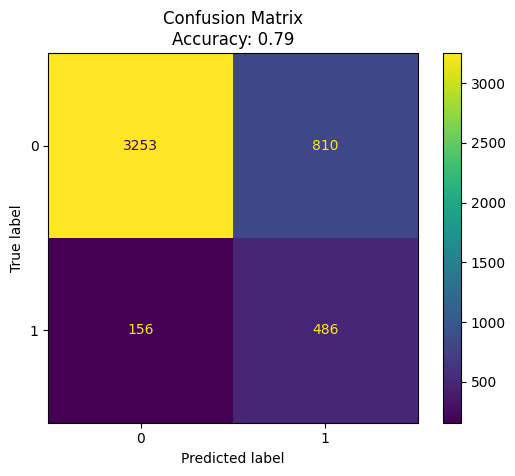

In [159]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4063
           1       0.38      0.76      0.50       642

    accuracy                           0.79      4705
   macro avg       0.66      0.78      0.69      4705
weighted avg       0.88      0.79      0.82      4705



### Boosting
Max Voting

In [194]:
model1 = LogisticRegression(random_state = 42)
model2 =  KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model = VotingClassifier(estimators = [('lr', model1), ('knn', model2), ('dt', model3)], voting = 'hard')
model.fit(X_resampled, y_resampled)
model.score(X_test,y_test)

0.8187035069075451

### Averaging

In [195]:
model1 = LogisticRegression(random_state = 42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

finalpred = (pred1 + pred2 + pred3) / 3
finalpred = np.argmax(finalpred.round(0), axis = 1)
(y_test == finalpred).sum() / len(finalpred)

0.8463336875664187

### Weighted Average

In [172]:
model1 = LogisticRegression(random_state = 42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

acc1 = accuracy_score(y_test, model1.predict(X_test))
acc2 = accuracy_score(y_test, model2.predict(X_test))
acc3 = accuracy_score(y_test, model3.predict(X_test))

acc_sum = acc1 + acc2 + acc3

weight1 = acc1/acc_sum
weight2 = acc2/acc_sum
weight3 = acc3/acc_sum

finalpred = (pred1*weight1 + pred2*weight2 + pred3*weight3)
finalpred = np.argmax(finalpred.round(0), axis = 1)
(y_test == finalpred).sum() / len(finalpred)


0.8469713071200851

### Weighted Ensemble Accuracy givving weight to trade-off between precision and recall - f1 score 

In [164]:
model1 = LogisticRegression(random_state=42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap=True, n_estimators=100, max_depth=10, random_state=42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

acc1 = accuracy_score(y_test, model1.predict(X_test))
acc2 = accuracy_score(y_test, model2.predict(X_test))
acc3 = accuracy_score(y_test, model3.predict(X_test))

# Calculate F1-score for each model
f1_1 = f1_score(y_test, model1.predict(X_test))
f1_2 = f1_score(y_test, model2.predict(X_test))
f1_3 = f1_score(y_test, model3.predict(X_test))

# Calculate weights based on F1-score
weight_sum = f1_1 + f1_2 + f1_3

weight1 = f1_1 / weight_sum
weight2 = f1_2 / weight_sum
weight3 = f1_3 / weight_sum

# Combine predictions using F1-based weights
final_pred = (pred1 * weight1 + pred2 * weight2 + pred3 * weight3)
final_pred = np.argmax(final_pred.round(0), axis=1)
accuracy = (y_test == final_pred).sum() / len(final_pred)

print(f"Weighted Ensemble Accuracy(F1 score priority): {accuracy:.2f}")


Weighted Ensemble Accuracy: 0.85


In [196]:
model1 = LogisticRegression(random_state=42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap=True, n_estimators=100, max_depth=10, random_state=42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

acc1 = accuracy_score(y_test, model1.predict(X_test))
acc2 = accuracy_score(y_test, model2.predict(X_test))
acc3 = accuracy_score(y_test, model3.predict(X_test))

# Calculate recall for each model
recall_1 = recall_score(y_test, model1.predict(X_test))
recall_2 = recall_score(y_test, model2.predict(X_test))
recall_3 = recall_score(y_test, model3.predict(X_test))

# Calculate weights based on recall
weight_sum = recall_1 + recall_2 + recall_3

weight1 = recall_1 / weight_sum
weight2 = recall_2 / weight_sum
weight3 = recall_3 / weight_sum

# Combine predictions using recall-based weights
final_pred = (pred1 * weight1 + pred2 * weight2 + pred3 * weight3)
final_pred = np.argmax(final_pred.round(0), axis=1)
accuracy = (y_test == final_pred).sum() / len(final_pred)

print(f"Weighted Ensemble Accuracy(recall priority): {accuracy:.2f}")


Weighted Ensemble Accuracy(recall priority): 0.84


In [197]:
print(classification_report(y_test, finalpred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4063
           1       0.46      0.64      0.53       642

    accuracy                           0.85      4705
   macro avg       0.70      0.76      0.72      4705
weighted avg       0.87      0.85      0.86      4705



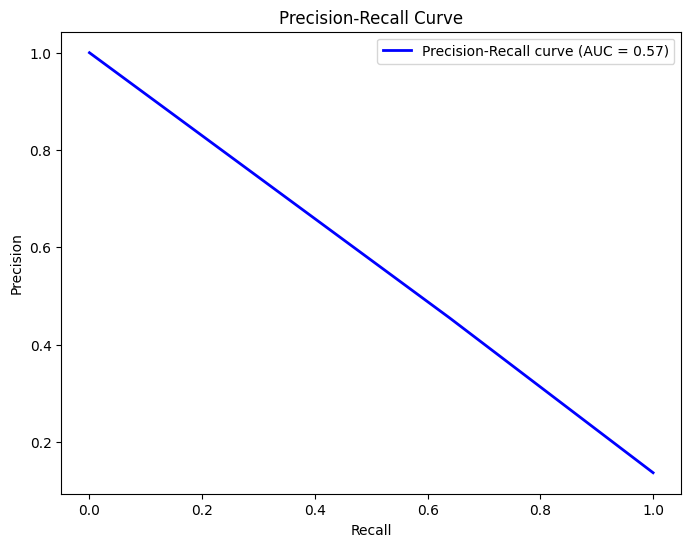

In [198]:
precision, recall, thresholds = precision_recall_curve(y_test, finalpred)
area = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


In [127]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
y_pred_proba

array([0.        , 0.23567409, 0.58111212, ..., 0.52920288, 0.30932817,
       0.12262668])

### Stacking

In [200]:
# Implementation of Stacking in Scikit-Learn
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(random_state = 42)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state = 42))
]

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf.fit(X_resampled, y_resampled).score(X_test, y_test)

0.8021253985122211

In [201]:
# Evaluate your model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4063
           1       0.38      0.76      0.50       642

    accuracy                           0.79      4705
   macro avg       0.66      0.78      0.69      4705
weighted avg       0.88      0.79      0.82      4705



### XGBoost

In [202]:
# Fit model to training data
xgb = XGBClassifier(random_state=42,
                    n_jobs=-1,
                    n_estimators=1000,
                    learning_rate=0.3,
                    subsample=0.65,
                    )
xgb.fit(X_resampled, y_resampled).score(X_test, y_test)
# Make predictions on test set
#y_pred = xgb.predict(X_test)

0.7997874601487779

In [203]:
# Evaluate your model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4063
           1       0.38      0.76      0.50       642

    accuracy                           0.79      4705
   macro avg       0.66      0.78      0.69      4705
weighted avg       0.88      0.79      0.82      4705

